In [1]:
import numpy as np

In [13]:
#HORIZONTAL_MAX = 228000
HORIZONTAL_MAX = 228000
#VERTICAL_MAX = 228000
VERTICAL_MAX = 228000
LENGTH_MAX = 32767
LENGTH_MAX_VALUE_MM = 1830 # without offset

LENGTH_V_OFFSET = 8557

LENGTH_OFFSET = 34 + 152 + 4 # mm
HEIGHT_OFFSET = 0

def convert_to_xyz(h, v, l):
    # Normalize h and v to radians between 0 and 2π using numpy
    h_angle = (h % HORIZONTAL_MAX) * (2 * np.pi / HORIZONTAL_MAX)
    v_angle = (v % VERTICAL_MAX) * (2 * np.pi / VERTICAL_MAX)
    
    # Compute the radial distance r
    r = (l - LENGTH_V_OFFSET)*(LENGTH_MAX_VALUE_MM/ (LENGTH_MAX-LENGTH_V_OFFSET)) 
    
    # Convert spherical to Cartesian coordinates
    x = r * np.cos(v_angle) * np.cos(h_angle)
    y = r * np.cos(v_angle) * np.sin(h_angle)
    z = r * np.sin(v_angle)
    

    return x, y, z

In [24]:
def convert_length(l):
    return (l - LENGTH_V_OFFSET)*(LENGTH_MAX_VALUE_MM/ (LENGTH_MAX-LENGTH_V_OFFSET)) 

In [20]:
fl = [
    0,
    100,
    200,
    300,
    400,
    500,
    600,
    700,
    800,
    900,
    1000,
    1100,
    1200,
    1300,
    1400,
    1500,
    1600,
    1700,
    1800
]

l = [
    8573,
    9904, 
    11099,
    12436,
    13803,
    15113,
    16410,
    17788,
    19112,
    20464,
    21803,
    23126,
    24515,
    25796,
    27125,
    28478,
    29875,
    31153,
    32519
]

In [21]:
num = 9600
interpolation = np.interp(num, l,fl)
print(interpolation)

77.16003005259203


In [7]:
import matplotlib.pyplot as plt

In [25]:
l1 = np.linspace(8570,32800,200)
fl1 = np.interp(l1,l,fl)
fl2 = convert_length(l1)

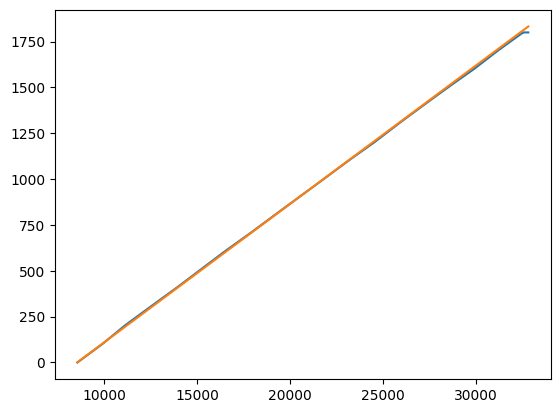

In [26]:
plt.plot(l1,fl1)
plt.plot(l1,fl2)

In [27]:
offset_length = 155+35

In [28]:
diff = np.average(fl1-fl2)
print(diff)

-1.205382595068531


In [2]:
import numpy as np


In [4]:
ANGLE_PERIOD = 228000

In [7]:
def calc_angle_between(ang1, ang2):
    ang = np.abs(ang2 - ang1)
    return (ang % ANGLE_PERIOD) * (2 * np.pi / ANGLE_PERIOD)

ang = calc_angle_between(-3700,53566)
print(np.rad2deg(ang))


90.42


In [19]:
ll = np.arange(0,1850,50) -4
ll

array([  -4,   46,   96,  146,  196,  246,  296,  346,  396,  446,  496,
        546,  596,  646,  696,  746,  796,  846,  896,  946,  996, 1046,
       1096, 1146, 1196, 1246, 1296, 1346, 1396, 1446, 1496, 1546, 1596,
       1646, 1696, 1746, 1796])

In [11]:
fll = np.array([
    8527,9137,9759,10429,11082,11751,12406,13088,13763,14456,15095,
    15785,16422,17132,17802,18443,19126,19784,20479,21122,
    21787,22484,23110,23789,24455,25109,25771,26493,27117,27792,
    28446,29146,29813,30477,31137,31804,32472
])

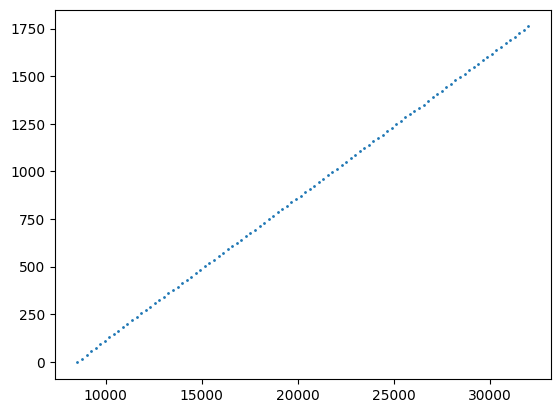

In [12]:
x = np.linspace(8527,32000,100)
y = np.interp(x,fll,ll)

plt.scatter(x,y, s=1)

In [15]:
res = np.polyfit(fll,ll,1)

In [16]:
res

array([ 7.48991715e-02, -6.35971459e+02])

In [17]:
p = np.poly1d(res)

np.float64(113.02025557642696)

In [26]:
32.71-35.088

-2.378

In [ ]:
1442 1440